### Import data

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import os.path
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.optimize import minimize
from DATA import get_filtered_stock_data as gfs
from DATA import read_data
from DATA import delete_pickle_file
from Effient_Frontier import efficient_frontier 
from Rank_stocks import rank_stocks
from Effient_Frontier import ESG_efficient_frontier
from Effient_Frontier import ESG_efficient_frontier_gw
from backtest import backtest
from Effient_Frontier import get_mean_matrices
from Effient_Frontier import get_cov_matrices

In [2]:
#delete_pickle_file('ESG_US.csv.pickle')

In [3]:
file_path = "ESG_US.csv"
esg = read_data(file_path)
column_name = 'environment_score'
column_value = 'High'
threshold = 0
operator = 'geq'
prefixes= ['US']
start_date = '2000-01-01'
end_date = '2020-01-01'

In [4]:
returns = gfs(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', threshold=threshold, operator=operator)

In [5]:
mu = get_mean_matrices(returns)
cov =  get_cov_matrices(returns)[1]
esg = read_data(file_path)
target = np.linspace(np.min(mu), np.max(mu), 100)
rf = 0.00
bounds = [(0, 1) for _ in range(len(mu))]
score = 'environment_score'
window = 5
get_plots = False

In [7]:
#eff = efficient_frontier(mu, cov, target, rf, bounds, esg, returns, score)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.3325300962115545
            Iterations: 66
            Function evaluations: 22185
            Gradient evaluations: 66


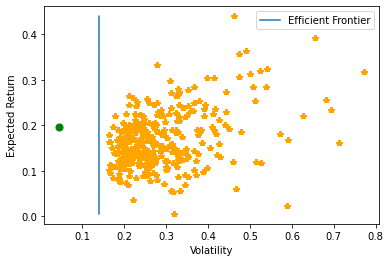

In [31]:
#Get the mean return of the stocks and the covariance matrix
mean = get_mean_matrices(rank_stocks(returns,num,rf))
cov = get_cov_matrices(rank_stocks(returns,num,rf))[1]
        
#Set the target, used for the efficient frontier module 
target = np.linspace(np.min(mean), np.max(mean), 100)
        
#Create the bounds
bounds = [(0, 1) for _ in range(len(mean))]
        
#Alot of computation here is unessecary for the backtest. 
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontier(mean, cov, target, rf, bounds, esg, rank_stocks(returns,num,rf), score,lower_bound,get_plots=True)

plt.plot(frontier[:,1], frontier[:,0], label='Efficient Frontier')
plt.plot(stdevs, mu, '*', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Plot a red dot at the portfolio with the highest Sharpe ratio
plt.scatter(max_sharpe_vol, max_sharpe_ret, marker='o', color='g', s=50, label='Max Sharpe Ratio')
plt.show()

In [7]:
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt = efficient_frontier(mu, cov, target, rf, bounds, esg, returns, score,lower_bound=0,get_plots=False)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.332520049010508
            Iterations: 59
            Function evaluations: 19836
            Gradient evaluations: 59


In [11]:
w_opt.round(3)

array([0.   , 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.052, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.   , 0.   , 0.041, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.087, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.   , 0.018,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.043, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.013, 0.   ,
       0.   , 0.   ,

In [6]:
ESG_fron = ESG_efficient_frontier(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', operator=operator, esg=esg, rf=rf, score=score)

400
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.9883070650823367
            Iterations: 58
            Function evaluations: 15261
            Gradient evaluations: 58
425
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.9979093219982107
            Iterations: 56
            Function evaluations: 14235
            Gradient evaluations: 56
450
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.87434972476847
            Iterations: 47
            Function evaluations: 11473
            Gradient evaluations: 47
475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.8704203080436597
            Iterations: 50
            Function evaluations: 11803
            Gradient evaluations: 50
500
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.853234133488996
            Itera

Text(0, 0.5, 'Sharpe Ratio')

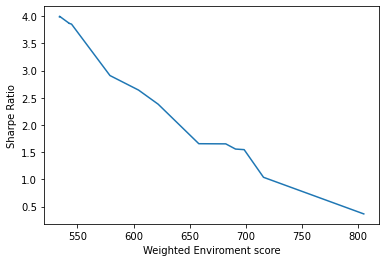

In [7]:
plt.plot(ESG_fron[1], ESG_fron[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [ ]:
ESG_GW = ESG_efficient_frontier_gw(rf,returns,esg,score)

400
Optimal weights: [0.     0.     0.     0.0083 0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.052  0.     0.     0.     0.
 0.     0.     0.0069 0.     0.     0.     0.     0.     0.     0.0006
 0.     0.     0.0409 0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0054 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.0871 0.0036 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.0119 0.     0.     0.018
 0.     0.     0.     0.     0.     0.     0.0101 0.     0.     0.
 0.     0.     0.     0.     0.     0.0431 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0131 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0008 0.     0.053  0.     0.
 0.     0.     0.     0.     0.   

Text(0, 0.5, 'Sharpe Ratio')

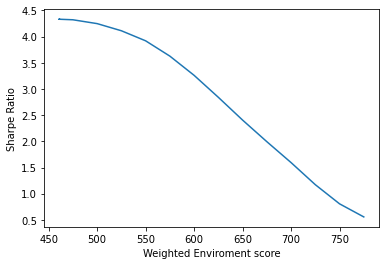

In [6]:
plt.plot(ESG_GW[1], ESG_GW[0])
plt.plot(ESG_fron[1], ESG_fron[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [13]:
BacktestDF = backtest(rf,esg,returns,score, window ,num,lower_bound)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.52162016887177
            Iterations: 15
            Function evaluations: 180
            Gradient evaluations: 15
For window:  0
Expected return:  0.3117107987783258
Realized return:  0.08703203925049996
Expected volatility:  0.021455168248805494
Realized volatility:  0.10887041355455654
Portfolio value:  108.70320392504999


Optimization terminated successfully    (Exit mode 0)
            Current function value: -12.506622756786559
            Iterations: 18
            Function evaluations: 213
            Gradient evaluations: 18
For window:  1
Expected return:  0.2509859204452955
Realized return:  0.12920095016079453
Expected volatility:  0.021610224855209453
Realized volatility:  0.05559744717416339
Portfolio value:  122.74776115768906


Optimization terminated successfully    (Exit mode 0)
            Current function value: -11.401742413351535
            Iterations: 13
            

In [14]:
display(BacktestDF)

,Expected returns,Realized returns,Expected stds,Realized stds,Expected srs,Realized srs,Portfolio Value,Portfolio E Score
0,0.311711,0.087032,0.021455,0.108870,14.528471,0.799409,108.703204,450.426158
1,0.250986,0.129201,0.021610,0.055597,11.614221,2.323865,122.747761,554.556751
2,0.178388,0.095464,0.017790,0.040480,10.027429,2.358324,134.465742,555.775928
3,0.218014,-0.140349,0.010971,0.164990,19.870957,-0.850648,115.593676,505.520524
4,0.256936,0.121714,0.029631,0.058720,8.671335,2.072801,129.663027,586.973317
5,0.212949,0.361176,0.024453,0.070898,8.708472,5.094335,176.494192,512.767663
6,0.237436,0.219646,0.027333,0.030066,8.686769,7.305556,215.260434,605.111896
7,0.231992,0.241551,0.029200,0.023624,7.944879,10.224929,267.256771,607.169191
8,0.259167,0.247933,0.027206,0.023051,9.526277,10.755635,333.518546,523.335203
9,0.253721,0.215253,0.012225,0.028586,20.753547,7.530062,405.309403,508.197153


In [15]:
display(BacktestDF.mean())

Expected returns       0.235506
Realized returns       0.147293
Expected stds          0.020150
Realized stds          0.057602
Expected srs          13.154930
Realized srs           4.994309
Portfolio Value      289.450067
Portfolio E Score    517.743991
dtype: float64

In [23]:
'''
max_sharpe_ret = eff[0]
max_sharpe_vol = eff[1]
max_sharpe_sr = eff[2]
portfolio_esg = eff[3]
print(portfolio_esg)
fron=eff[4]
mu = eff[5]
stdevs_ = eff[6]
'''

'\nmax_sharpe_ret = eff[0]\nmax_sharpe_vol = eff[1]\nmax_sharpe_sr = eff[2]\nportfolio_esg = eff[3]\nprint(portfolio_esg)\nfron=eff[4]\nmu = eff[5]\nstdevs_ = eff[6]\n'